Character Level Language Model: Knows how to predict the next character in a sequence

In [3]:
words = open("video_2_dependencies/names.txt").read().splitlines()

In [4]:
len(words)

32033

In [8]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

For isabella, can understand it as a name is likely to start with I, with S following I, A following IS, and B following ISA, and after ISABELLA, the word is likely to end

We dont have a single word, but multiple names, so  a lot of structure to model

We are building a bigram model, working with 2 Chars at a time, in which we are looking at one character we are given, and trying to predict the next Char in the sequence

In [15]:
#Count BiGram Frequency in Training Set
b = {}
#Create BiGrams
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 #Same as b[bigram] but in case bigram is not in b, assign initial value 0

In [16]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [18]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [19]:
import torch

In [21]:
a = torch.zeros((3, 5), dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [22]:
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [32]:
N = torch.zeros(28, 28, dtype = torch.int32)

In [33]:
#creating a look up table to map chars to idx, which in turn can index into N array of 1st char by 2nd char (the frequency of the 2nd word following the 1st word)
chars = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27

In [34]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1

In [38]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

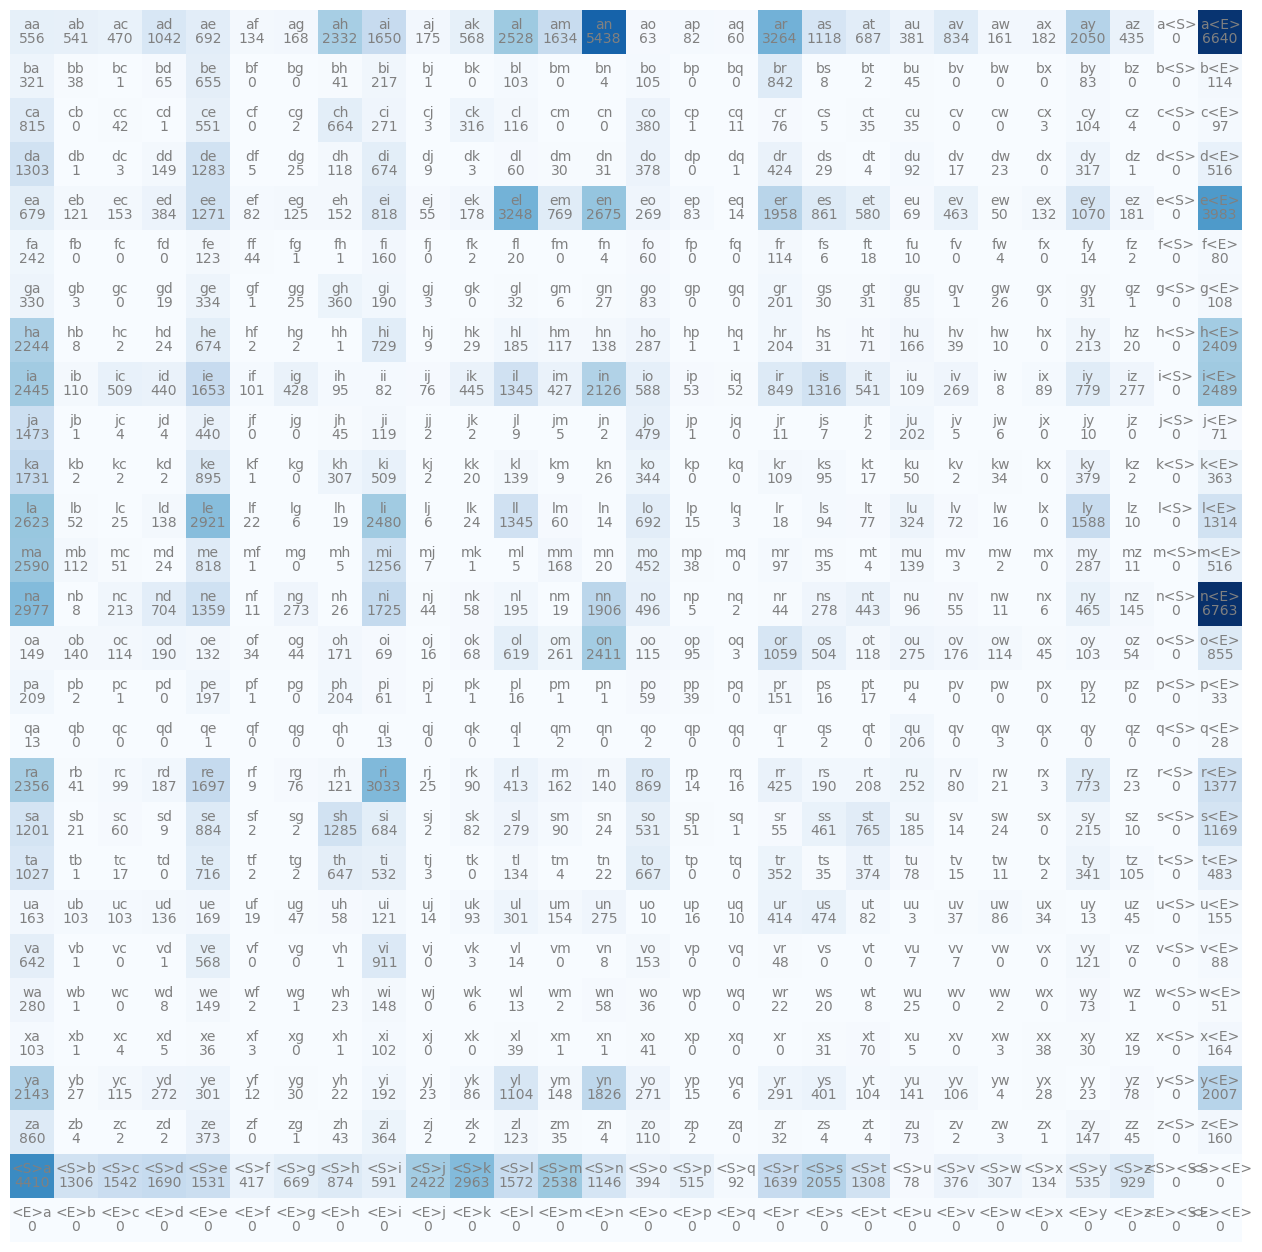

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = "Blues")

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "gray")
        plt.text(j, i, N[i,j].item(), ha = "center", va = "top", color = "gray")
plt.axis("off")

In [40]:
N = torch.zeros(27, 27, dtype = torch.int32)
chars = sorted(list(set("".join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1

#Opted to remove start and stop token due to the fact has wasted columns where STOP token which first char in word (not possible) and START token was last char in word (not possible)
#Replaced both a with a single "." token

In [41]:
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = "Blues")

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "gray")
        plt.text(j, i, N[i,j].item(), ha = "center", va = "top", color = "gray")
plt.axis("off")

#Now Row 1 is the counts for all starting/first chars
#Now Column 1 is the counts for end chars

(-0.5, 26.5, 26.5, -0.5)

In [42]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [44]:
#Sample from raw counts 

p = N[0].float()
#create prob distribution
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [48]:
g = torch.Generator().manual_seed(2147483647) #Makes deterministic
p = torch.rand(3, generator =  g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [49]:
torch.multinomial(p, num_samples = 20, replacement = True, generator = g)
#Samples from provided probability distribution/tensor, and returns corresponding indices

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [56]:
#Sample from raw counts 
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [57]:
g = torch.Generator().manual_seed(2147483647) 
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
print(ix, itos[ix])

3 c


In [79]:
P = N.float()

In [80]:
P.sum()

tensor(228146.)

In [81]:
P.sum(0) #Would be taking the 0th dimension and summing across it
print(P.sum(0).shape, P.sum(0, keepdim=True).shape)
#Without keepdim, squeezes out the dimension

torch.Size([27]) torch.Size([1, 27])


In [82]:
P.sum(1, keepdim = True).shape

torch.Size([27, 1])

In [107]:
P = (N +1).float() #Model smoothing: Add fake count of 1, to avoid scenarios in which bigrams that do not appear in the training data are assigned a probability of 1
P /= P.sum(1, keepdim = True) #Using /= inplace operations save memory over p = p/p.sum

In [84]:
# 27 27
#  27 1

#Broadcasting
#Align the two arrays, on the right
#iterate from right to left, dims must either be equal, or one must be one, or one must not exist

#Thus P/P.sum(1, keepdim = True is allowed)
#What happens, is that it takes dim 1 in 27,1 and stretches it out (copies it) 27 times column wise, such that it is 27x27 internally

In [85]:
#Be careful with broadcasting
#If used P.sum(1), without keepdim = True

# 27 27
# 27

#Align all dims on the right
# 27 27
#    27

#iterate from right to left, dims must either be equal, or one must be one, or one must not exist
#internall it will create a 1
# 27 27
# 1  27

#will broadcast

#BUT here the sums of the rows, are now in a 1,27 row vector, which is copied/stretched 27x row-wise, making an element in column 1 dividing by the sum of row 1, an element in column 2 dividing by row 2 etc... instead of the sum of their columns

In [73]:
g = torch.Generator().manual_seed(2147483647) 

for _ in range(20):
    out = []
    ix = 0 #This corresponds to the start token
    while True: 
        p = P[ix]
        # p = N[ix].float()
        # p = p/p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0: #if the new sampled ix is 0, it now represents the end token
            break
    print("".join(out)) 

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [90]:
for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:.4f}")

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960


Since we have 27 possible tokens, and if everything was equally likely, we would expect all the probs to be 1/27 (4%); in the context of predicting the next char given the first char. So anything above 4%, would highlight that we have learned something useful from the bigram statistics. Here we can see the model has assigned a relatively high prob to whatever was in the training set. We would epect a good model to give a prob near 1.0, since this meands model is correctly predicting what comes next w.r.t to training set

In [94]:
1/27

0.037037037037037035

The likelihood is the product of probabilities, and what it is telling us the probability of the dataset assigned by the model we have trained, and that is a measure of quality. The product should be as high as possible, when you are training a model (i.e maximize likelihood w.r.t to model parameters). However, we can see in the above set of probabilities, the product of all those probabilites will be a small unweildy number as multiplying numbers between 0 and 1. So for conveniance, individuals instead work with the log-likelihood. Log(1) = 0, log(0) = neg infinity. We can think of log as a means to scale the loss function (it is a monotonic function)

In [101]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelihood=}") 
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}") #This is loss of model

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
.i: 0.0184 -3.9927
is: 0.0743 -2.5990
sa: 0.1482 -1.9094
ab: 0.0160 -4.1373
be: 0.2476 -1.3958
el: 0.1590 -1.8386
ll: 0.0964 -2.3397
la: 0.1879 -1.6717
a.: 0.1960 -1.6299
.s: 0.0642 -2.7465
so: 0.0655 -2.7256
op: 0.0120 -4.4250
ph: 0.1988 -1.6153
hi: 0.0957 -2.3463
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.c: 0.0481 -3.0337
ch: 0.1880 -1.6713
ha: 0.2946 -1.2220
ar: 0.0963 -2.3400
rl: 0.0325 -3.4259
lo: 0.0496 -3.0042
ot: 0.0149 -4.2082
tt: 0.0671 -2.7009
te: 0.1285 -2.0515
e.: 0.1950 -1.6346
.m: 0.0792 -2.5354
mi: 0.1891 -1.6655
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
am: 0.0482 -3.0319
me: 0.1232 -2.0943
el: 0.1590 -1.8386
li: 0.1777 -1.7278
ia: 0.1381 -1.9796
a.: 0.1960 -

Can see high numbers, give values close to 0, but those with low/bad probs return low/negative numbers
The reason we use log transforms is because log(axbxc) = log(a) +log(b) + log(c), thus log likelihood is the sum of the logs of the individual probabilities 

The negative log likelihood, is the negative of the log likelihood and is used such that low loss = good, and high loss = bad. The lowest it can get is 0, and the highest is pos infinity. You can also make it average over n examples, by dividing nll/n

The lower the loss, the better the model, as it assigning high probability to your data

In [108]:
#Compute prob of specific word

log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelihood=}") 
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


NN approach

In [110]:
# Create the training set of bigrams
xs = []
ys = []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

#Use torch.tensor over torch.Tensor, since Tensor forces float type and tensor infers dtpye

In [111]:
xs

tensor([ 0,  5, 13, 13,  1])

In [112]:
ys

tensor([ 5, 13, 13,  1,  0])

In [114]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27)

In [115]:
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [116]:
xenc.shape

torch.Size([5, 27])

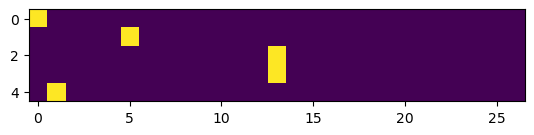

In [117]:
plt.imshow(xenc)

When plugging in values to NN, we want them to be floats which can take various values, so need to cast one-hot encoded vector to Float

In [118]:
xenc = F.one_hot(xs, num_classes = 27).float()

In [119]:
xenc.dtype

torch.float32

In [122]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-1.6790,  2.1473,  0.1095, -1.8481, -0.9014, -0.0197, -0.5403,  0.2993,
          1.1968, -0.6966, -0.2830, -0.6304,  1.2422, -0.9722, -2.3963,  0.1627,
          0.7087, -0.4282, -0.2142,  0.1989,  0.9973,  0.1449,  1.7741,  0.3280,
         -1.7249,  1.8885,  1.0735],
        [ 1.6082, -0.5354,  0.3220,  0.4109, -1.3409, -0.3465, -1.5372, -0.0201,
         -1.5103,  0.7109, -0.0274,  1.2133,  0.8739,  0.2784, -1.9505,  1.1564,
         -0.0954, -0.2952, -0.1381,  0.2279,  1.5004,  1.7680, -0.0097,  1.6092,
         -0.1701, -0.2534,  1.7760],
        [-1.3821,  0.8516, -1.6634,  0.6223,  0.3106, -0.3558,  0.7679,  0.2916,
          1.5816,  0.6184,  0.5213,  0.0732,  0.9021, -0.0244, -0.8401, -1.0622,
          0.1321,  1.4818,  1.7116,  0.8464,  1.1512, -1.3369,  0.0466,  0.6173,
         -1.2169, -0.4438,  2.4506],
        [-1.3821,  0.8516, -1.6634,  0.6223,  0.3106, -0.3558,  0.7679,  0.2916,
          1.5816,  0.6184,  0.5213,  0.0732,  0.9021, -0.0244, -0.8401, -1.0622

For every single training example, attempting to output prob distribution for the next char in the sequence (and their are 27 of them)

In [125]:
(xenc @ W).exp()

#Through exp, converted all negative log counts to postive number less then 1, and all posisitive log counts as greater then 1
#This can, in a sense, be interpreted as true counts (similiar to bigram count table)
# (this is needed to get the propery of probabilites: all values positive and all values sum to 1)

tensor([[ 0.1866,  8.5619,  1.1158,  0.1575,  0.4060,  0.9805,  0.5826,  1.3489,
          3.3094,  0.4983,  0.7535,  0.5324,  3.4632,  0.3782,  0.0911,  1.1767,
          2.0314,  0.6517,  0.8072,  1.2200,  2.7108,  1.1560,  5.8948,  1.3882,
          0.1782,  6.6094,  2.9256],
        [ 4.9936,  0.5854,  1.3798,  1.5082,  0.2616,  0.7072,  0.2150,  0.9801,
          0.2209,  2.0359,  0.9730,  3.3647,  2.3963,  1.3210,  0.1422,  3.1784,
          0.9090,  0.7444,  0.8710,  1.2560,  4.4836,  5.8592,  0.9904,  4.9990,
          0.8436,  0.7761,  5.9064],
        [ 0.2510,  2.3435,  0.1895,  1.8633,  1.3643,  0.7006,  2.1553,  1.3386,
          4.8625,  1.8559,  1.6842,  1.0760,  2.4649,  0.9759,  0.4317,  0.3457,
          1.1413,  4.4011,  5.5379,  2.3312,  3.1621,  0.2626,  1.0477,  1.8539,
          0.2962,  0.6416, 11.5950],
        [ 0.2510,  2.3435,  0.1895,  1.8633,  1.3643,  0.7006,  2.1553,  1.3386,
          4.8625,  1.8559,  1.6842,  1.0760,  2.4649,  0.9759,  0.4317,  0.3457

In [128]:
logits = xenc @ W
#Softmax function below
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
probs
#Now output of NN can be interpreted as probability, as how likely each of these 27 chars are to come next; for each training example

tensor([[0.0038, 0.1743, 0.0227, 0.0032, 0.0083, 0.0200, 0.0119, 0.0275, 0.0674,
         0.0101, 0.0153, 0.0108, 0.0705, 0.0077, 0.0019, 0.0240, 0.0414, 0.0133,
         0.0164, 0.0248, 0.0552, 0.0235, 0.1200, 0.0283, 0.0036, 0.1346, 0.0596],
        [0.0962, 0.0113, 0.0266, 0.0291, 0.0050, 0.0136, 0.0041, 0.0189, 0.0043,
         0.0392, 0.0187, 0.0648, 0.0462, 0.0255, 0.0027, 0.0612, 0.0175, 0.0143,
         0.0168, 0.0242, 0.0864, 0.1129, 0.0191, 0.0963, 0.0163, 0.0150, 0.1138],
        [0.0045, 0.0417, 0.0034, 0.0332, 0.0243, 0.0125, 0.0384, 0.0238, 0.0866,
         0.0330, 0.0300, 0.0192, 0.0439, 0.0174, 0.0077, 0.0062, 0.0203, 0.0783,
         0.0986, 0.0415, 0.0563, 0.0047, 0.0187, 0.0330, 0.0053, 0.0114, 0.2064],
        [0.0045, 0.0417, 0.0034, 0.0332, 0.0243, 0.0125, 0.0384, 0.0238, 0.0866,
         0.0330, 0.0300, 0.0192, 0.0439, 0.0174, 0.0077, 0.0062, 0.0203, 0.0783,
         0.0986, 0.0415, 0.0563, 0.0047, 0.0187, 0.0330, 0.0053, 0.0114, 0.2064],
        [0.0295, 0.0150,

In [129]:
probs[0].sum()

tensor(1.)

OPTIMIZATION

In [131]:
xs

tensor([ 0,  5, 13, 13,  1])

In [132]:
ys

tensor([ 5, 13, 13,  1,  0])

In [151]:
# Randomly initialize 27 neurons' weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

In [158]:
#forward pass
enc = F.one_hot(xs, num_classes = 27).float() #input to the network; one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() #counts, equivalent to N
probs = counts/counts.sum(1, keepdims = True) #Probabilites for next character

In [159]:
#Compute loss w.r.t to target chars
loss = -torch.mean(probs[torch.arange(len(probs)), ys].log())

In [154]:
#backward pass
W.grad = None #set zero to gradient
loss.backward()


In [ ]:
#PyTorch, like micrograd, builds a full computational graph of operations which used W and its parents

In [157]:
print(loss)

tensor(3.7693, grad_fn=<NegBackward0>)


In [156]:
W.data += -0.1 * W.grad

In [160]:
print(loss)

tensor(3.7492, grad_fn=<NegBackward0>)


In [155]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [184]:
xs = []
ys = []

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

In [185]:
for k in range(500):
    xenc = F.one_hot(xs, num_classes = 27).float() #input to the network; one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() #counts, equivalent to N
    probs = counts/counts.sum(1, keepdims = True) #Probabilites for next character
    loss = -torch.mean(probs[torch.arange(len(xs)), ys].log())
    print(loss)
    W.grad = None #set zero to gradient

    loss.backward()

    W.data += -50 * W.grad


tensor(3.7590, grad_fn=<NegBackward0>)
tensor(3.3711, grad_fn=<NegBackward0>)
tensor(3.1540, grad_fn=<NegBackward0>)
tensor(3.0204, grad_fn=<NegBackward0>)
tensor(2.9277, grad_fn=<NegBackward0>)
tensor(2.8604, grad_fn=<NegBackward0>)
tensor(2.8097, grad_fn=<NegBackward0>)
tensor(2.7701, grad_fn=<NegBackward0>)
tensor(2.7381, grad_fn=<NegBackward0>)
tensor(2.7115, grad_fn=<NegBackward0>)
tensor(2.6890, grad_fn=<NegBackward0>)
tensor(2.6697, grad_fn=<NegBackward0>)
tensor(2.6529, grad_fn=<NegBackward0>)
tensor(2.6383, grad_fn=<NegBackward0>)
tensor(2.6254, grad_fn=<NegBackward0>)
tensor(2.6140, grad_fn=<NegBackward0>)
tensor(2.6039, grad_fn=<NegBackward0>)
tensor(2.5948, grad_fn=<NegBackward0>)
tensor(2.5867, grad_fn=<NegBackward0>)
tensor(2.5794, grad_fn=<NegBackward0>)
tensor(2.5728, grad_fn=<NegBackward0>)
tensor(2.5668, grad_fn=<NegBackward0>)
tensor(2.5613, grad_fn=<NegBackward0>)
tensor(2.5563, grad_fn=<NegBackward0>)
tensor(2.5516, grad_fn=<NegBackward0>)
tensor(2.5474, grad_fn=<N

We would expect a loss near that what we got with bigram counting, but here we did so through gradient based optimization. This makes sense because fundamentally, we are not taking in any additional information, we are taking the previous character and predicting the next one

If we incentivise W's to be near 0, it is basically label smoothing (i.e adding +1 or +1000 to N), as the probabilities are much more uniform. The more this incentivised in the loss function, the smooth the distribution you will achieve. This brings us to regularization, where the loss can be augmented to have a small component called a regularization loss. EX. R = (W**2).mean(); if W ares 0, no loss, if W not 0, will have loss, can added nll to have loss = nll + 0.01*R, where 0.01 denotes strength of regularization (equivalent to adding +1 or +1000 to N). Now the loss is not only aiming to ensure probs match the training data, but also keep weights low (and in turn make probs uniform)

In [183]:
g = torch.Generator().manual_seed(2147483647) 

for _ in range(5):
    out = []
    ix = 0 
    while True: 
        x_enc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = x_enc @ W
        counts = logits.exp()
        p = counts/counts.sum(1, keepdim = True)
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out)) 

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
